In [1]:
import tensorflow as tf
from  tensorflow  import keras

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

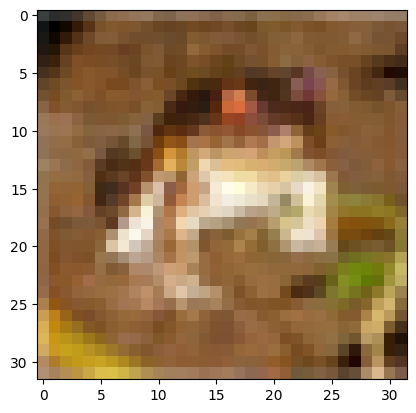

In [6]:
plt.imshow(x_train[0])

In [23]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
print(y_train.shape)
y_train=y_train.reshape(-1)

(50000, 1)


In [29]:
	classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [30]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

(None, None)

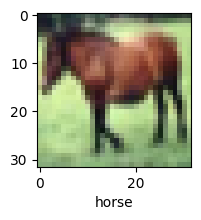

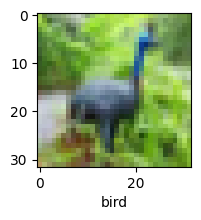

In [32]:
plot_sample(x_train,y_train,7),plot_sample(x_train,y_train,6)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
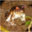

In [34]:
x_train[0]

In [35]:
x_train_Scaled=x_train/255
x_test_Scaled=x_test/255

In [86]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=(2,2),padding="same",strides=(2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"),

    keras.layers.Flatten(),


    keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation="softmax")




])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,586 (846.04 KB)

 Trainable params: 216,586 (846.04 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [89]:
model.fit(x_train_Scaled,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3045 - loss: 1.9992
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5089 - loss: 1.4975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5627 - loss: 1.3812
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5948 - loss: 1.3087
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6163 - loss: 1.2677
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6362 - loss: 1.2234
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6501 - loss: 1.1905
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6548 - loss: 1.1806
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6626 - loss: 1.1642
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6672 - loss: 1.1521


In [90]:
model.evaluate(x_test_Scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6698 - loss: 1.1290


[1.133147120475769, 0.6728000044822693]

In [92]:
y_test=y_test.reshape(-1)

In [100]:
y_pred=model.predict(x_test_Scaled)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.7286086e-03, 3.7765872e-02, 2.4977399e-02, ..., 5.3516882e-03,
        1.7916201e-01, 5.0201003e-02],
       [9.7582710e-04, 4.3104097e-02, 1.9706263e-06, ..., 5.5773015e-08,
        9.5537871e-01, 5.3586799e-04],
       [3.1688094e-02, 5.0650660e-02, 6.8215397e-03, ..., 1.0141915e-03,
        8.5231447e-01, 3.2672804e-02],
       ...,
       [1.7354371e-03, 9.7315595e-04, 9.0880156e-02, ..., 1.1581061e-01,
        7.9899718e-04, 2.1005198e-03],
       [6.9231905e-02, 1.4935275e-02, 6.0239218e-02, ..., 3.0940674e-02,
        4.3523042e-03, 7.5878501e-03],
       [1.9977265e-04, 1.4000288e-05, 1.3288750e-03, ..., 8.6380100e-01,
        2.5516633e-06, 1.3173513e-04]], dtype=float32)

In [123]:
import numpy as np
np.argmax(y_pred[2])

8

In [124]:
y_test[1]

8

In [128]:
np.argmax(model.predict(x_test_Scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [129]:
from sklearn.metrics import confusion_matrix,classification_report

In [130]:
y_pred=[np.argmax(i )for i in y_pred]

In [133]:
y_pred[:5
       ]

[3, 8, 8, 8, 6]

In [137]:
c=confusion_matrix(y_test, y_pred)
c

array([[668,  24,  60,  15,  23,   3,  17,   9, 133,  48],
       [ 13, 824,   1,   3,   4,   1,  13,   1,  36, 104],
       [ 68,  10, 459,  52, 147,  46, 151,  36,  19,  12],
       [ 15,  19,  63, 394, 120, 105, 196,  33,  21,  34],
       [ 17,   5,  47,  29, 701,  10, 103,  63,  16,   9],
       [ 11,   3,  65, 201,  79, 464,  88,  53,  15,  21],
       [  2,   7,  26,  26,  31,   7, 884,   2,  10,   5],
       [ 15,   6,  35,  35, 106,  36,  23, 709,   7,  28],
       [ 36,  36,   9,   9,   3,   2,  23,   2, 851,  29],
       [ 15, 122,   6,   7,   6,   3,  15,  10,  42, 774]])

<Axes: >

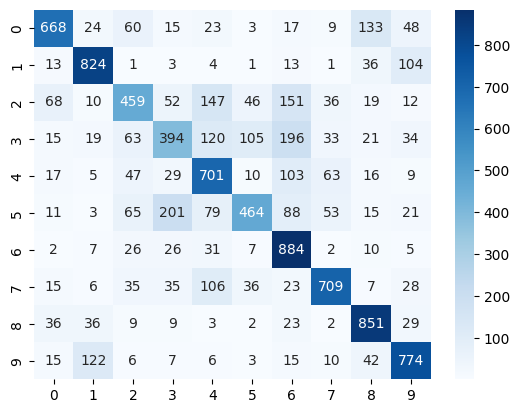

In [140]:
import seaborn as sns
sns.heatmap(c,annot=True,fmt="d",cmap="Blues")

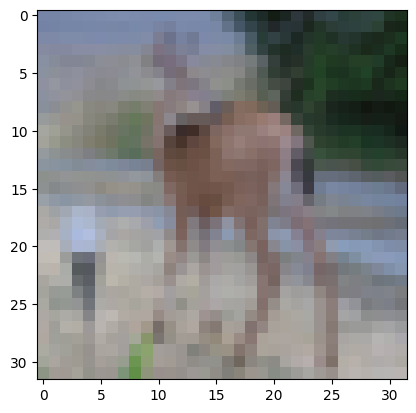

In [150]:

plt.imshow(x_test[100])